In [5]:
import pandas as pd
import os

folder_path = r"C:\Users\Asus\Downloads\api_data_aadhar_biometric\api_data_aadhar_biometric"


In [6]:
files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
print(files)


['api_data_aadhar_biometric_0_500000.csv', 'api_data_aadhar_biometric_1000000_1500000.csv', 'api_data_aadhar_biometric_1500000_1861108.csv', 'api_data_aadhar_biometric_500000_1000000.csv']


In [7]:
full_paths = [os.path.join(folder_path, f) for f in files]

df = pd.concat([pd.read_csv(f) for f in full_paths], ignore_index=True)

print("Merged dataset shape:", df.shape)
df.head()


Merged dataset shape: (1861108, 6)


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [8]:
df = df.drop_duplicates()
df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1766212 entries, 0 to 1860557
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.3+ MB


In [9]:
df.to_csv(r"C:\Users\Asus\Downloads\aadhaar_biometric_complete.csv", index=False)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Asus\Downloads\aadhaar_biometric_complete.csv")
df.head()


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [11]:
df.shape        # rows, columns
df.columns      # column names
df.info()       # data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766212 entries, 0 to 1766211
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 80.9+ MB


In [14]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["year"] = df["date"].dt.year


In [15]:
df[["date", "year"]].head()
df["year"].isnull().sum()


np.int64(0)

In [16]:
df = df.dropna(subset=["year"])
df["year"] = df["year"].astype(int)


In [18]:
df["total_bio_updates"] = df["bio_age_5_17"] + df["bio_age_17_"]


In [19]:
print(df.columns)

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'year', 'total_bio_updates'],
      dtype='object')


In [21]:
df["year"].value_counts().sort_index()


year
2025    1766212
Name: count, dtype: int64

In [22]:
df["month"] = df["date"].dt.month


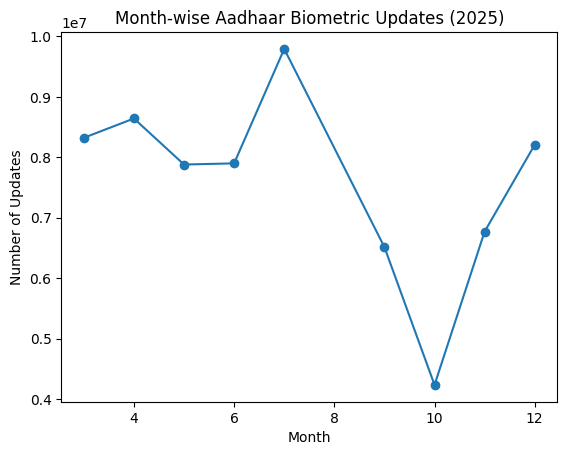

In [23]:
month_data = df.groupby("month")["total_bio_updates"].sum()

month_data.plot(kind="line", marker="o")
plt.title("Month-wise Aadhaar Biometric Updates (2025)")
plt.xlabel("Month")
plt.ylabel("Number of Updates")
plt.show()


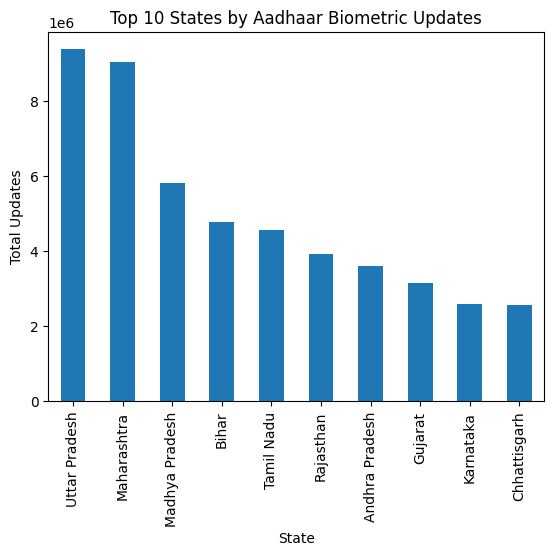

In [24]:
state_data = (
    df.groupby("state")["total_bio_updates"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

state_data.plot(kind="bar")
plt.title("Top 10 States by Aadhaar Biometric Updates")
plt.xlabel("State")
plt.ylabel("Total Updates")
plt.show()


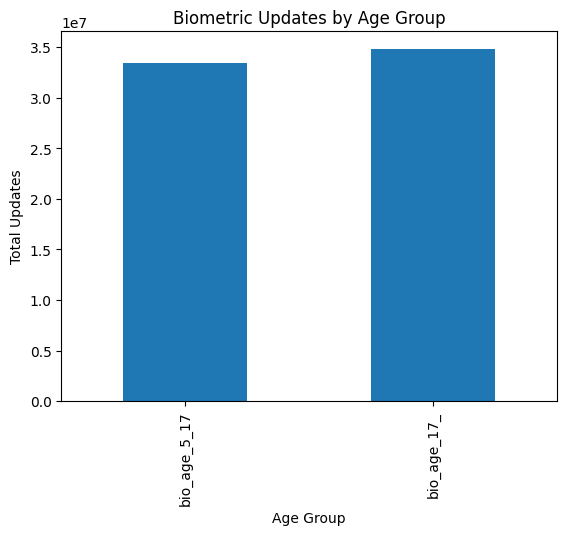

In [25]:
age_data = df[["bio_age_5_17", "bio_age_17_"]].sum()

age_data.plot(kind="bar")
plt.title("Biometric Updates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Updates")
plt.show()


In [43]:
# Create a safe copy
X = df.loc[:, ["state", "district", "pincode", "month"]].copy()
y = df["total_bio_updates"]

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Encode categorical columns
le_state = LabelEncoder()
le_district = LabelEncoder()

X.loc[:, "state"] = le_state.fit_transform(X["state"])
X.loc[:, "district"] = le_district.fit_transform(X["district"])

# Scale features (mandatory for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
print("KNN R² Score:", r2_score(y_test, y_pred))


KNN R² Score: 0.4499858570970514


Random Forest R² Score: 0.7453489888834963


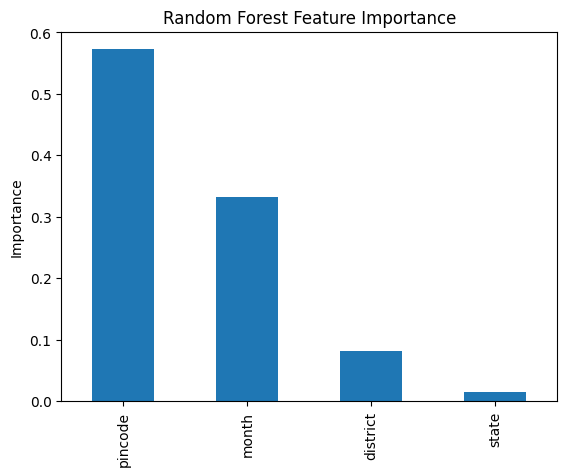

In [44]:
# ===============================
# 1. FEATURES & TARGET
# ===============================
X = df.loc[:, ["state", "district", "pincode", "month"]].copy()
y = df["total_bio_updates"]


# ===============================
# 2. ENCODE CATEGORICAL FEATURES
# ===============================
from sklearn.preprocessing import LabelEncoder

le_state = LabelEncoder()
le_district = LabelEncoder()

X.loc[:, "state"] = le_state.fit_transform(X["state"])
X.loc[:, "district"] = le_district.fit_transform(X["district"])


# ===============================
# 3. TRAIN-TEST SPLIT
# ===============================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ===============================
# 4. TRAIN RANDOM FOREST MODEL
# ===============================
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,     # number of trees
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


# ===============================
# 5. MODEL EVALUATION
# ===============================
rf_score = rf_model.score(X_test, y_test)
print("Random Forest R² Score:", rf_score)


# ===============================
# 6. FEATURE IMPORTANCE
# ===============================
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.plot(kind="bar")
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.show()
